<a href="https://colab.research.google.com/github/RitvikVankayala/NLP/blob/main/Sentimental_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score,f1_score,confusion_matrix

In [3]:
!wget -nc https://lazyprogrammer.me/course_files/AirlineTweets.csv

--2023-01-29 05:50:57--  https://lazyprogrammer.me/course_files/AirlineTweets.csv
Resolving lazyprogrammer.me (lazyprogrammer.me)... 104.21.23.210, 172.67.213.166, 2606:4700:3030::ac43:d5a6, ...
Connecting to lazyprogrammer.me (lazyprogrammer.me)|104.21.23.210|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3421431 (3.3M) [text/csv]
Saving to: ‘AirlineTweets.csv’

AirlineTweets.csv   100%[===================>]   3.26M  --.-KB/s    in 0.08s   

2023-01-29 05:50:58 (39.0 MB/s) - ‘AirlineTweets.csv’ saved [3421431/3421431]



In [4]:
df_=pd.read_csv('AirlineTweets.csv')

In [5]:
df_.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [6]:
df=df_[['airline_sentiment','text']].copy()

In [7]:
df.head()

,airline_sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you've added commercials t...
2,neutral,@VirginAmerica I didn't today... Must mean I n...
3,negative,@VirginAmerica it's really aggressive to blast...
4,negative,@VirginAmerica and it's a really big bad thing...


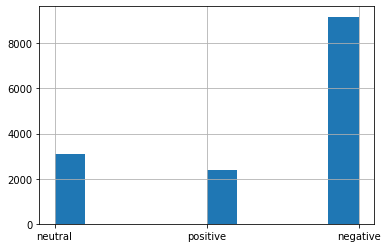

In [8]:
df['airline_sentiment'].hist()

In [9]:
target_mapping={'positive':1,'negative':-1,'neutral':0}
df['targets']=df['airline_sentiment'].map(target_mapping)

In [10]:
df.head()

,airline_sentiment,text,targets
0,neutral,@VirginAmerica What @dhepburn said.,0
1,positive,@VirginAmerica plus you've added commercials t...,1
2,neutral,@VirginAmerica I didn't today... Must mean I n...,0
3,negative,@VirginAmerica it's really aggressive to blast...,-1
4,negative,@VirginAmerica and it's a really big bad thing...,-1


In [11]:
df_train,df_test=train_test_split(df)

In [12]:
df_train.head()

,airline_sentiment,text,targets
6504,negative,@SouthwestAir I was helped by a nice lady at P...,-1
509,negative,@united Your ERI-ORD express connections are h...,-1
10958,negative,@USAirways is the worst!! Still haven't left.....,-1
7373,negative,"FYI, @JetBlue: The last email response - ""we u...",-1
8000,neutral,@JetBlue do you have any afternoon flights goi...,0


In [13]:
vectorizer=TfidfVectorizer(max_features=2000)

In [14]:
x_train=vectorizer.fit_transform(df_train['text'])
x_test=vectorizer.transform(df_test['text'])

In [15]:
x_train

<10980x2000 sparse matrix of type '<class 'numpy.float64'>'
	with 157388 stored elements in Compressed Sparse Row format>

In [16]:
y_train=df_train['targets']
y_test=df_test['targets']

In [17]:
model=LogisticRegression(max_iter=1000)
model.fit(x_train,y_train)

print("train accuracy :",model.score(x_train,y_train))
print("test accuracy :",model.score(x_test,y_test))

train accuracy : 0.8548269581056467
test accuracy : 0.8043715846994536


Once have a look on the roc_auc_score its a bit confusing

In [18]:
prob_train=model.predict_proba(x_train)
prob_test=model.predict_proba(x_test)

print("train AUC :",roc_auc_score(y_train,prob_train,multi_class='ovo'))
print("test AUC :",roc_auc_score(y_test,prob_test,multi_class='ovo'))

train AUC : 0.9429147968913756
test AUC : 0.891923180536507


In [19]:
p_train=model.predict(x_train)
p_test=model.predict(x_test)

In [20]:
cm=confusion_matrix(y_train,p_train,normalize='true')
cm

array([[0.96342538, 0.02893655, 0.00763807],
       [0.29883139, 0.65358932, 0.0475793 ],
       [0.19087838, 0.0990991 , 0.71002252]])

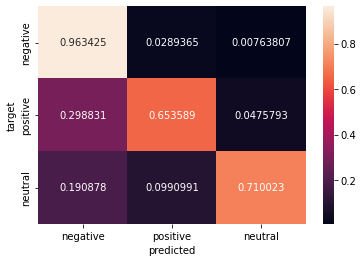

In [21]:
def plot_cm(cm):
  classess=['negative','positive','neutral']
  df_cm=pd.DataFrame(cm,index=classess,columns=classess)
  ax=sn.heatmap(df_cm,annot=True,fmt='g')
  ax.set_xlabel("predicted")
  ax.set_ylabel("target")

plot_cm(cm)

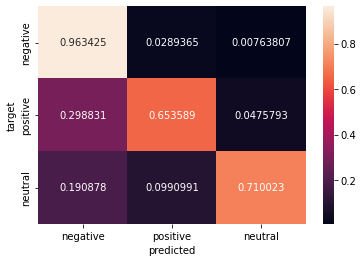

In [22]:
cm_test=confusion_matrix(y_test,p_test,normalize='true')
plot_cm(cm)

MODEL INTERPRETATION AND BINARY LABELING

In [25]:
binary_target_list=[target_mapping['positive'],target_mapping['negative']]
df_b_train=df_train[df_train['targets'].isin(binary_target_list)]
df_b_test=df_test[df_test['targets'].isin(binary_target_list)]

In [26]:
df_b_train.head()

,airline_sentiment,text,targets
6504,negative,@SouthwestAir I was helped by a nice lady at P...,-1
509,negative,@united Your ERI-ORD express connections are h...,-1
10958,negative,@USAirways is the worst!! Still haven't left.....,-1
7373,negative,"FYI, @JetBlue: The last email response - ""we u...",-1
5660,negative,"@SouthwestAir so, when your plane doesn't work...",-1


In [30]:
X_train=vectorizer.fit_transform(df_b_train['text'])
X_test=vectorizer.transform(df_b_test['text'])

In [28]:
Y_train=df_b_train['targets']
Y_test=df_b_test['targets']

In [31]:
model=LogisticRegression(max_iter=500)
model.fit(X_train,Y_train)

print("train accuracy :",model.score(X_train,Y_train))
print("test accuracy :",model.score(X_train,Y_train))

train accuracy : 0.9303355079217148
test accuracy : 0.9303355079217148


In [33]:
prob_train=model.predict_proba(X_train)[:,1]
prob_test=model.predict_proba(X_test)[:,1]

print("train AUC :",roc_auc_score(Y_train,prob_train))
print("test AUC :",roc_auc_score(Y_test,prob_test))

train AUC : 0.978559479904405
test AUC : 0.9546090038025


In [35]:
model.coef_

# gives the information regarding the weights

array([[-0.35754755,  0.38223151, -0.18297889, ..., -0.07451715,
        -0.34085466, -0.72003594]])

(array([  1.,   1.,   1.,   2.,   2.,   9.,  16.,  41., 129., 581., 747.,
        276., 119.,  40.,  18.,   0.,   2.,   6.,   2.,   2.,   2.,   0.,
          1.,   0.,   0.,   0.,   0.,   0.,   0.,   2.]),
 array([-4.44055125, -4.01844698, -3.59634271, -3.17423844, -2.75213417,
        -2.3300299 , -1.90792563, -1.48582136, -1.06371709, -0.64161282,
        -0.21950855,  0.20259572,  0.62469999,  1.04680426,  1.46890853,
         1.8910128 ,  2.31311707,  2.73522134,  3.15732561,  3.57942988,
         4.00153415,  4.42363842,  4.84574269,  5.26784696,  5.68995123,
         6.1120555 ,  6.53415977,  6.95626404,  7.37836831,  7.80047258,
         8.22257685]),
 <a list of 30 Patch objects>)

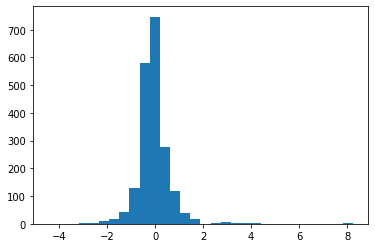

In [37]:
plt.hist(model.coef_[0],bins=30)

In [ ]:
# We should maintain a map btw word and idx to know which word corressponds to which targets

word_idx_map=vectorizer.vocabulary_
word_idx_map

In [39]:
# calculating weight of each wordt
threshold=2.2

print("Most positive words :")
for word,idx in word_idx_map.items():
  weight=model.coef_[0][idx]
  if weight>threshold:
    print(word,weight)

Most positive words :
southwestair 3.3686927183004585
jetblue 2.9601591711098547
best 3.605359380602214
thanks 8.22257685039809
appreciate 2.9960919257650653
amazing 3.954192274710014
worries 2.853735183722385
good 3.07721726981454
great 5.026806132180893
thank 8.096661921659603
love 4.28137020885631
wonderful 2.477068901807973
virginamerica 3.41487056948839
awesome 4.188083905469795
thx 2.8560378750976265
excellent 2.5138778111724167
kudos 3.060611023293442


In [42]:
print("Most Negative words:")

for word,idx in word_idx_map.items():
  weight=model.coef_[0][idx]
  if weight<-threshold:
    print(word,weight)

Most Negative words:
hours -3.273091969962105
hold -2.538720205643229
worst -3.1271271120133304
no -3.7266467141083894
why -2.3209884687807745
what -2.28166992252553
not -4.44055125411529
cancelled -3.0593159239648156
nothing -2.220489323895157
hour -2.2328257270951664
delayed -2.600457862644095
